In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#read in the data
path = 'problemlist.csv'
data = pd.read_csv('problemlist.csv', delimiter = '|', encoding='latin-1', error_bad_lines=False)

In [5]:
len(data['icd10'].unique())

12633

In [7]:
len(data['prob_dx_nm'].unique())

60534

In [38]:
#this function takes in a row and dictates if this patient is diagnosed with sleep disorder
def isSleep (row):
    if 'G47' in row.icd10:
        return 1;
    else:
        return 0;

In [61]:
#create a new isSleepDisorder column that matches each patient id to a binary value
pd.options.mode.chained_assignment = None
idx_sleep = data.icd10.str.contains('^G', regex=True, na=False)
filtered_sleep = data[idx_sleep]
filtered_sleep['isSleepDisorder'] = filtered_sleep.apply(lambda row: isSleep(row), axis = 1)
filtered_sleep.drop(['prob_noted_dt_m', 'prob_resolved_dt_m', 
                        'icd10', 'prob_dx_nm', 'prob_dx_grp', 'prob_status'], axis = 1, inplace = True)
filtered_sleep

,studyid,isSleepDisorder
25,PT149297,0
46,PT149321,1
56,PT149345,1
61,PT149355,1
84,PT149479,1
94,PT149507,1
95,PT149507,1
116,PT149567,0
128,PT149592,1
136,PT150069,0


In [52]:
filtered_sleep['isSleepDisorder'].value_counts()

0    70115
1    35151
Name: isSleepDisorder, dtype: int64

In [44]:
#check if a patient is diagnosed with anxiety
def isAnxiety (row):
    if 'F41' in row.icd10:
        return 1;
    else:
        return 0;

In [57]:
#check if a patient is diagnosed with depression
def isDepression (row):
    if 'F32' in row.icd10:
        return 1;
    else:
        return 0;

In [60]:
idx_depress = data.icd10.str.contains('^F', regex=True, na=False)
filtered_depress = data[idx_depress]
filtered_depress['isAnxiety'] = filtered_depress.apply(lambda row: isAnxiety(row), axis = 1)
filtered_depress['isDepressed'] = filtered_depress.apply(lambda row: isDepression(row), axis = 1)
filtered_depress.drop(['prob_noted_dt_m', 'prob_resolved_dt_m', 
                        'icd10', 'prob_dx_nm', 'prob_dx_grp', 'prob_status'], axis = 1, inplace = True)
filtered_depress

,studyid,isAnxiety,isDepressed
6,PT149256,0,1
9,PT149263,0,0
11,PT149267,0,0
13,PT14927,0,1
15,PT149275,1,0
16,PT149276,0,0
24,PT149294,0,1
31,PT149301,1,0
32,PT149303,0,0
33,PT149304,1,0


In [53]:
filtered_depress['isAnxiety'].value_counts()

0    229055
1    108036
Name: isAnxiety, dtype: int64

In [73]:
data = pd.read_csv('problemlist.csv', delimiter = '|', encoding='latin-1', error_bad_lines=False)
idx_depressAndSleep = data.icd10.str.contains('^F|^G', regex=True, na=False)
filtered_both = data[idx_depressAndSleep]
filtered_both['isSleepDisorder'] = filtered_both.apply(lambda row: isSleep(row), axis = 1)
filtered_both['isDepressed'] = filtered_both.apply(lambda row: isDepression(row), axis = 1)
filtered_both['isAnxiety'] = filtered_both.apply(lambda row: isAnxiety(row), axis = 1)
filtered_both.head(20)

,studyid,prob_noted_dt_m,prob_resolved_dt_m,icd10,prob_dx_nm,prob_dx_grp,prob_status,isSleepDisorder,isDepressed,isAnxiety
6,PT149256,2002-10-06,NaN,F32.9,"DEPRESSIVE DISORDER, NOT ELSEWHERE CLASSIFIED",MENTAL DISORDERS,ACTIVE,0,1,0
9,PT149263,2008-12-25,NaN,F17.200,TOBACCO USE DISORDER,MENTAL DISORDERS,ACTIVE,0,0,0
11,PT149267,2015-11-03,2016-11-16,F43.23,ADJUSTMENT REACTION WITH ANXIETY AND DEPRESSION,MENTAL DISORDERS,RESOLVED,0,0,0
13,PT14927,2011-01-28,NaN,F32.9,"DEPRESSIVE DISORDER, NOT ELSEWHERE CLASSIFIED",MENTAL DISORDERS,ACTIVE,0,1,0
15,PT149275,2007-03-25,NaN,F41.1,ANXIETY STATE,MENTAL DISORDERS,ACTIVE,0,0,1
16,PT149276,2013-10-14,NaN,F31.9,BIPOLAR 1 DISORDER (HCC),MENTAL DISORDERS,ACTIVE,0,0,0
24,PT149294,2012-12-06,NaN,F32.9,"DEPRESSIVE DISORDER, NOT ELSEWHERE CLASSIFIED",MENTAL DISORDERS,ACTIVE,0,1,0
25,PT149297,2010-03-05,2013-01-07,G24.1,IDIOPATHIC TORSION DYSTONIA,NERVOUS SYSTEM AND SENSE ORGANS,RESOLVED,0,0,0
31,PT149301,2016-09-25,NaN,F41.9,ANXIETY,MENTAL DISORDERS,ACTIVE,0,0,1
32,PT149303,2015-09-13,NaN,F90.9,ADHD (ATTENTION DEFICIT HYPERACTIVITY DISORDER),MENTAL DISORDERS,ACTIVE,0,0,0


In [74]:
from datetime import datetime

In [106]:
#calculate the number of days it took to resolve a problem 
def resolveTime (row):
    if 'RESOLVED' in row.prob_status and type(row.prob_noted_dt_m) is str and type(row.prob_resolved_dt_m) is str:
        start = datetime.strptime(row.prob_noted_dt_m, '%Y-%m-%d')
        end = datetime.strptime(row.prob_resolved_dt_m, '%Y-%m-%d')
        return end - start;
    else:
        return 'Not Applicable';

In [107]:
filtered_both['resolveTime'] = filtered_both.apply(lambda row: resolveTime(row), axis = 1)
filtered_both.head(20)

,studyid,prob_noted_dt_m,prob_resolved_dt_m,icd10,prob_dx_nm,prob_dx_grp,prob_status,isSleepDisorder,isDepressed,isAnxiety,resolveTime
6,PT149256,2002-10-06,NaN,F32.9,"DEPRESSIVE DISORDER, NOT ELSEWHERE CLASSIFIED",MENTAL DISORDERS,ACTIVE,0,1,0,Not Applicable
9,PT149263,2008-12-25,NaN,F17.200,TOBACCO USE DISORDER,MENTAL DISORDERS,ACTIVE,0,0,0,Not Applicable
11,PT149267,2015-11-03,2016-11-16,F43.23,ADJUSTMENT REACTION WITH ANXIETY AND DEPRESSION,MENTAL DISORDERS,RESOLVED,0,0,0,"379 days, 0:00:00"
13,PT14927,2011-01-28,NaN,F32.9,"DEPRESSIVE DISORDER, NOT ELSEWHERE CLASSIFIED",MENTAL DISORDERS,ACTIVE,0,1,0,Not Applicable
15,PT149275,2007-03-25,NaN,F41.1,ANXIETY STATE,MENTAL DISORDERS,ACTIVE,0,0,1,Not Applicable
16,PT149276,2013-10-14,NaN,F31.9,BIPOLAR 1 DISORDER (HCC),MENTAL DISORDERS,ACTIVE,0,0,0,Not Applicable
24,PT149294,2012-12-06,NaN,F32.9,"DEPRESSIVE DISORDER, NOT ELSEWHERE CLASSIFIED",MENTAL DISORDERS,ACTIVE,0,1,0,Not Applicable
25,PT149297,2010-03-05,2013-01-07,G24.1,IDIOPATHIC TORSION DYSTONIA,NERVOUS SYSTEM AND SENSE ORGANS,RESOLVED,0,0,0,"1039 days, 0:00:00"
31,PT149301,2016-09-25,NaN,F41.9,ANXIETY,MENTAL DISORDERS,ACTIVE,0,0,1,Not Applicable
32,PT149303,2015-09-13,NaN,F90.9,ADHD (ATTENTION DEFICIT HYPERACTIVITY DISORDER),MENTAL DISORDERS,ACTIVE,0,0,0,Not Applicable


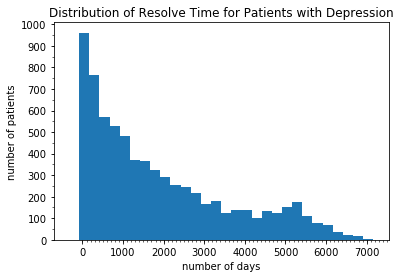

In [125]:
depress = filtered_both.loc[filtered_both['icd10'] == 'F32.9']
depress_resolved = depress.loc[depress['resolveTime'] != 'Not Applicable']
resolveTimeList = [x.days for x in depress_resolved['resolveTime'].tolist()]
fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1) 

major_y_ticks = np.arange(0, 1001, 100)                                              
minor_y_ticks = np.arange(0, 1001, 50)                                                                                             
minor_x_ticks = np.arange(0, 7501, 100)                                                         
ax.set_xticks(minor_x_ticks, minor=True)                                           
ax.set_yticks(major_y_ticks)                                                       
ax.set_yticks(minor_y_ticks, minor=True)                                           
plt.title('Distribution of Resolve Time for Patients with Depression')
plt.xlabel('number of days')
plt.ylabel('number of patients')
plt.hist(resolveTimeList, bins=30)
plt.show()

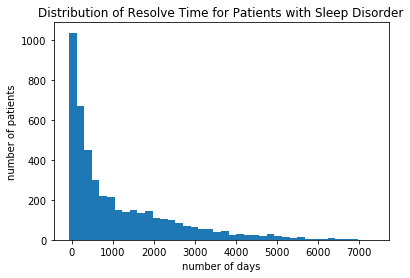

In [126]:
idx_sleep = filtered_both.icd10.str.contains('^G47', regex=True, na=False)
sleep = filtered_both[idx_sleep]
sleep_resolved = sleep.loc[sleep['resolveTime'] != 'Not Applicable']
resolveTimeList = [x.days for x in sleep_resolved['resolveTime'].tolist()]                                           
plt.title('Distribution of Resolve Time for Patients with Sleep Disorder')
plt.xlabel('number of days')
plt.ylabel('number of patients')
plt.hist(resolveTimeList, bins=40)
plt.show()

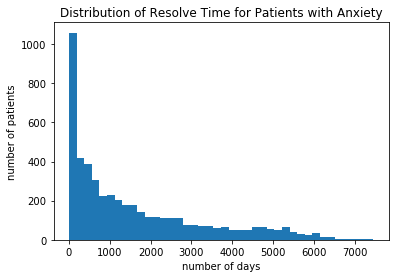

In [127]:
idx_anxiety = filtered_both.icd10.str.contains('^F41', regex=True, na=False)
anxiety = filtered_both[idx_anxiety]
anxiety_resolved = anxiety.loc[anxiety['resolveTime'] != 'Not Applicable']
resolveTimeList = [abs(x.days) for x in anxiety_resolved['resolveTime'].tolist()]                                           
plt.title('Distribution of Resolve Time for Patients with Anxiety')
plt.xlabel('number of days')
plt.ylabel('number of patients')
plt.hist(resolveTimeList, bins=40)
plt.show()

In [134]:
final_data = pd.read_csv('demographics_with_problems_labels_v2.csv', delimiter = ';', encoding='latin-1', error_bad_lines=False)

In [138]:
isSleep = final_data.loc[final_data['isSleepDisorder'] == 1]
isSleep['isActiveSleepDisorder'].value_counts()

1.0    34886
0.0     6253
Name: isActiveSleepDisorder, dtype: int64

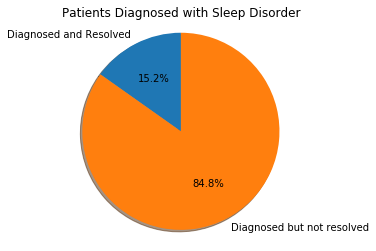

In [142]:
labels = 'Diagnosed and Resolved', 'Diagnosed but not resolved'
sizes = [6253/(6253+34886), 34886/(6253+34886)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Patients Diagnosed with Sleep Disorder')

plt.show()

In [140]:
isDepress = final_data.loc[final_data['isDepression'] == 1]
isDepress['isActiveDepression'].value_counts()

1.0    86193
0.0    11485
Name: isActiveDepression, dtype: int64

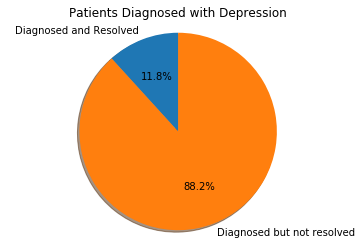

In [160]:
labels = 'Diagnosed and Resolved', 'Diagnosed but not resolved'
sizes = [11485/(11485+86193), 86193/(11485+86193)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Patients Diagnosed with Depression')
plt.show()

In [153]:
isDepress['isAnxiety'].value_counts()

0.0    62830
1.0    34848
Name: isAnxiety, dtype: int64

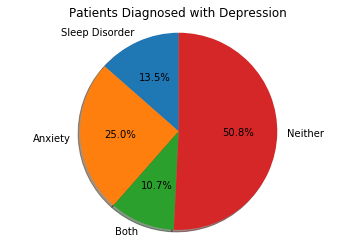

In [167]:
both = 0
anxiety = 0
sleep = 0
neither = 0
for index, row in isDepress.iterrows():
    if row.isAnxiety == 1 and row.isSleepDisorder == 1:
        both+=1
    elif row.isAnxiety == 1:
        anxiety+=1
    elif row.isSleepDisorder == 1:
        sleep+=1
    else:
        neither+=1

labels = 'Sleep Disorder', 'Anxiety', 'Both', 'Neither'
sizes = [sleep/len(isDepress.index), anxiety/len(isDepress.index), 
         both/len(isDepress.index), neither/len(isDepress.index)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Patients Diagnosed with Depression')
plt.show()

In [158]:
isDepress['isSleepDisorder'].value_counts()

0.0    74019
1.0    23659
Name: isSleepDisorder, dtype: int64

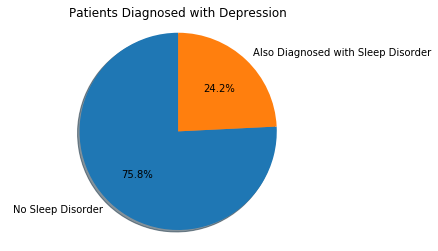

In [162]:
labels = 'No Sleep Disorder', 'Also Diagnosed with Sleep Disorder'
sizes = [74019/(11485+86193), 23659/(11485+86193)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Patients Diagnosed with Depression')
plt.show()

In [144]:
isAnxiety = final_data.loc[final_data['isAnxiety'] == 1]
isAnxiety['isActiveAnxiety'].value_counts()

1.0    110492
0.0      6478
Name: isActiveAnxiety, dtype: int64

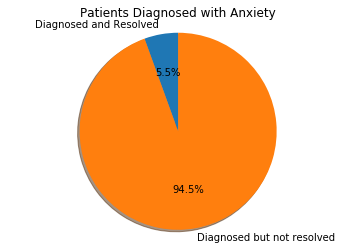

In [152]:
labels = 'Diagnosed and Resolved', 'Diagnosed but not resolved'
sizes = [6478/(110492+6478), 110492/(110492+6478)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Patients Diagnosed with Anxiety')
plt.show()

In [70]:
data.drop(['prob_noted_dt_m', 'prob_resolved_dt_m', 
                        'icd10', 'prob_dx_nm', 'prob_dx_grp', 'prob_status'], axis = 1, inplace = True)
data.head(20)

,studyid,isSleepDisorder,isDepressed,isAnxiety
0,PT135216,0,0,0
1,PT149225,0,0,0
2,PT149228,0,0,0
3,PT149234,0,0,0
4,PT149238,0,0,0
5,PT149254,0,0,0
6,PT149256,0,1,0
7,PT149263,0,0,0
8,PT149263,0,0,0
9,PT149263,0,0,0


In [67]:
result = pd.merge(filtered_sleep, filtered_depress, on='studyid', how='inner')
result

,studyid,isSleepDisorder,isAnxiety,isDepressed
0,PT149297,0,0,0
1,PT149297,0,0,0
2,PT149297,0,0,0
3,PT149297,0,0,1
4,PT149297,0,0,1
5,PT149297,0,0,1
6,PT149297,0,0,0
7,PT149297,0,0,0
8,PT149297,0,0,0
9,PT149297,0,0,0
